Using TensorFlow and Keras to load the IMDB movie review dataset.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Using TensorFlow and Keras to load the IMDB movie review dataset.
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

9999

Converting Word Indices to Text in IMDB dataset

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])


1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 129ms/step - loss: 0.5114 - accuracy: 0.7907 - val_loss: 0.3889 - val_accuracy: 0.8656
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.3220 - accuracy: 0.8917 - val_loss: 0.3184 - val_accuracy: 0.8811
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2437 - accuracy: 0.9183 - val_loss: 0.2843 - val_accuracy: 0.8873
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1956 - accuracy: 0.9357 - val_loss: 0.2852 - val_accuracy: 0.8849
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1665 - accuracy: 0.9447 - val_loss: 0.2852 - val_accuracy: 0.8840
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1417 - accuracy: 0.9535 - val_loss: 0.2838 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1169 - accuracy: 0.9659 - val_loss: 0.2951 - val_accuracy: 0.8846
Epoch 8/20
3

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

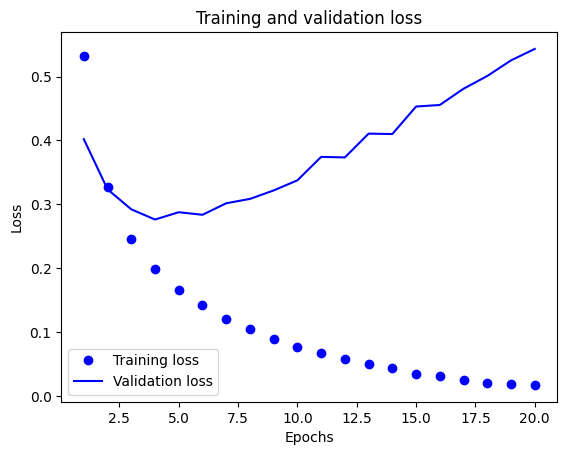

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

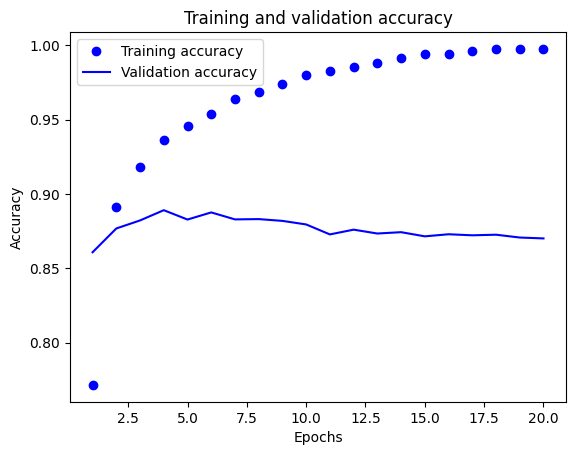

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Training the model

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 5s 53ms/step - loss: 0.4497 - accuracy: 0.8186
Epoch 2/4
49/49 [==============================] - 3s 52ms/step - loss: 0.2685 - accuracy: 0.9052
Epoch 3/4
49/49 [==============================] - 2s 48ms/step - loss: 0.2125 - accuracy: 0.9250
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2869 - accuracy: 0.8848


In [ ]:
results

[0.2853797674179077, 0.885200023651123]

In [ ]:
model.predict(x_test)


782/782 [==============================] - 2s 3ms/step


array([[0.23129295],
       [0.9996301 ],
       [0.732961  ],
       ...,
       [0.07824796],
       [0.06139134],
       [0.59268284]], dtype=float32)

Model-2

In [ ]:
model_11 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_11.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history3 = model_11.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict3 = history3.history
history_dict3.keys()

Epoch 1/20
30/30 [==============================] - 5s 137ms/step - loss: 0.5194 - accuracy: 0.7715 - val_loss: 0.3677 - val_accuracy: 0.8672
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2960 - accuracy: 0.8912 - val_loss: 0.3031 - val_accuracy: 0.8810
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2153 - accuracy: 0.9219 - val_loss: 0.2816 - val_accuracy: 0.8883
Epoch 4/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1657 - accuracy: 0.9422 - val_loss: 0.3336 - val_accuracy: 0.8718
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1402 - accuracy: 0.9523 - val_loss: 0.3044 - val_accuracy: 0.8834
Epoch 6/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1153 - accuracy: 0.9605 - val_loss: 0.3177 - val_accuracy: 0.8822
Epoch 7/20
30/30 [==============================] - 2s 71ms/step - loss: 0.0928 - accuracy: 0.9707 - val_loss: 0.3371 - val_accuracy: 0.8819
Epoch 8/20
3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

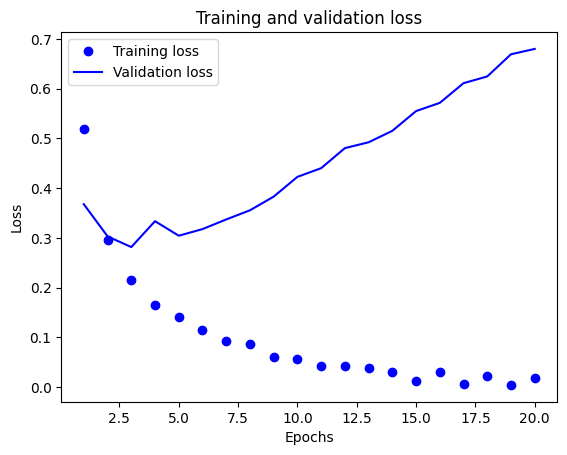

In [ ]:
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

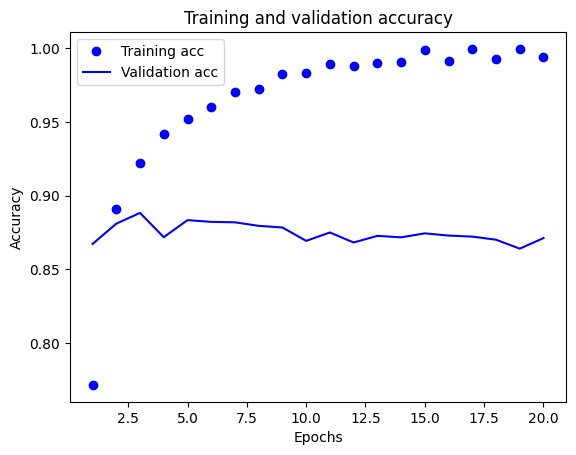

In [ ]:
plt.clf()
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_11.fit(x_train, y_train, epochs=12, batch_size=512)
results_M11 = model.evaluate(x_test, y_test)
results_M11

Epoch 1/12
49/49 [==============================] - 1s 27ms/step - loss: 0.2036 - accuracy: 0.9451
Epoch 2/12
49/49 [==============================] - 1s 25ms/step - loss: 0.1269 - accuracy: 0.9596
Epoch 3/12
49/49 [==============================] - 1s 28ms/step - loss: 0.0981 - accuracy: 0.9686
Epoch 4/12
49/49 [==============================] - 2s 36ms/step - loss: 0.0732 - accuracy: 0.9774
Epoch 5/12
49/49 [==============================] - 2s 33ms/step - loss: 0.0560 - accuracy: 0.9826
Epoch 6/12
49/49 [==============================] - 1s 26ms/step - loss: 0.0472 - accuracy: 0.9860
Epoch 7/12
49/49 [==============================] - 1s 26ms/step - loss: 0.0314 - accuracy: 0.9914
Epoch 8/12
49/49 [==============================] - 1s 25ms/step - loss: 0.0281 - accuracy: 0.9925
Epoch 9/12
49/49 [==============================] - 1s 25ms/step - loss: 0.0214 - accuracy: 0.9938
Epoch 10/12
49/49 [==============================] - 1s 25ms/step - loss: 0.0159 - accuracy: 0.9956
Epoch 11/

[0.6943451762199402, 0.49459999799728394]

Training the model with 32-Units

In [ ]:
model_21 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_21.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history21 = model_21.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict21 = history21.history
history_dict21.keys()

Epoch 1/20
30/30 [==============================] - 4s 113ms/step - loss: 0.5114 - accuracy: 0.7751 - val_loss: 0.3742 - val_accuracy: 0.8655
Epoch 2/20
30/30 [==============================] - 1s 45ms/step - loss: 0.3074 - accuracy: 0.8924 - val_loss: 0.3223 - val_accuracy: 0.8715
Epoch 3/20
30/30 [==============================] - 2s 57ms/step - loss: 0.2334 - accuracy: 0.9169 - val_loss: 0.2831 - val_accuracy: 0.8868
Epoch 4/20
30/30 [==============================] - 3s 85ms/step - loss: 0.1926 - accuracy: 0.9323 - val_loss: 0.2921 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1586 - accuracy: 0.9455 - val_loss: 0.2832 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1365 - accuracy: 0.9537 - val_loss: 0.2907 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 2s 66ms/step - loss: 0.1148 - accuracy: 0.9635 - val_loss: 0.3456 - val_accuracy: 0.8698
Epoch 8/20
3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

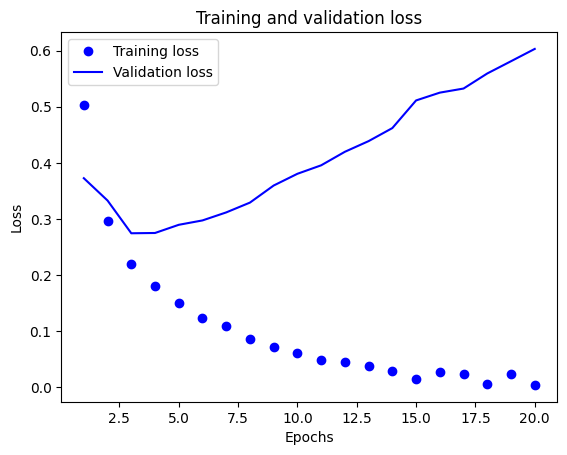

In [ ]:
loss_values = history_dict21["loss"]
val_loss_values = history_dict21["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

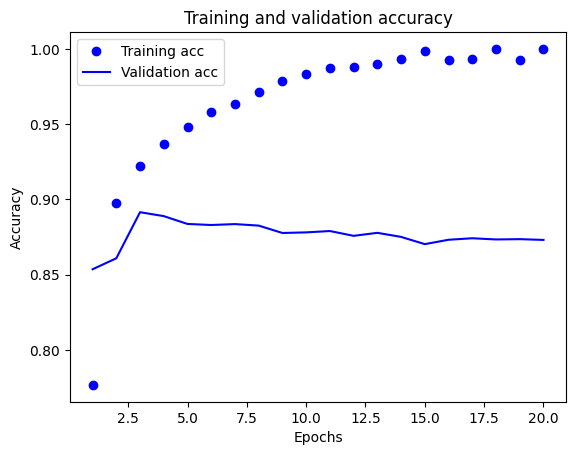

In [ ]:
plt.clf()
acc = history_dict21["accuracy"]
val_acc = history_dict21["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_21.fit(x_train, y_train, epochs=8, batch_size=512)
results_M21 = model_21.evaluate(x_test, y_test)
results_M21

Epoch 1/8
49/49 [==============================] - 2s 36ms/step - loss: 0.2006 - accuracy: 0.9458
Epoch 2/8
49/49 [==============================] - 2s 32ms/step - loss: 0.1271 - accuracy: 0.9600
Epoch 3/8
49/49 [==============================] - 2s 32ms/step - loss: 0.0992 - accuracy: 0.9693
Epoch 4/8
49/49 [==============================] - 1s 30ms/step - loss: 0.0769 - accuracy: 0.9768
Epoch 5/8
49/49 [==============================] - 2s 49ms/step - loss: 0.0601 - accuracy: 0.9831
Epoch 6/8
49/49 [==============================] - 2s 38ms/step - loss: 0.0474 - accuracy: 0.9866
Epoch 7/8
49/49 [==============================] - 2s 32ms/step - loss: 0.0362 - accuracy: 0.9910
Epoch 8/8
782/782 [==============================] - 3s 3ms/step - loss: 0.5778 - accuracy: 0.8537


[0.5778008699417114, 0.8536800146102905]

Training the model with 64-Units

In [ ]:
model_22 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_22.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history22 = model_22.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict22 = history22.history
history_dict22.keys()

Epoch 1/20
30/30 [==============================] - 6s 152ms/step - loss: 0.5154 - accuracy: 0.7473 - val_loss: 0.3665 - val_accuracy: 0.8525
Epoch 2/20
30/30 [==============================] - 2s 66ms/step - loss: 0.3033 - accuracy: 0.8833 - val_loss: 0.2956 - val_accuracy: 0.8820
Epoch 3/20
30/30 [==============================] - 2s 63ms/step - loss: 0.2263 - accuracy: 0.9162 - val_loss: 0.2789 - val_accuracy: 0.8883
Epoch 4/20
30/30 [==============================] - 2s 69ms/step - loss: 0.1834 - accuracy: 0.9311 - val_loss: 0.2946 - val_accuracy: 0.8826
Epoch 5/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1543 - accuracy: 0.9415 - val_loss: 0.2872 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 3s 89ms/step - loss: 0.1187 - accuracy: 0.9591 - val_loss: 0.3139 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 3s 90ms/step - loss: 0.1104 - accuracy: 0.9603 - val_loss: 0.3185 - val_accuracy: 0.8838
Epoch 8/20
3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss



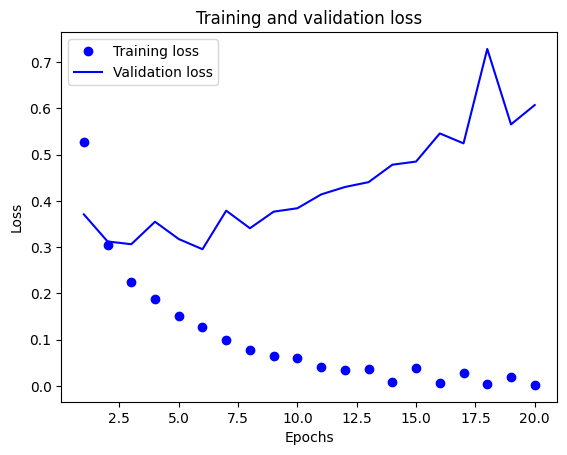

In [ ]:
loss_values = history_dict22["loss"]
val_loss_values = history_dict22["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy



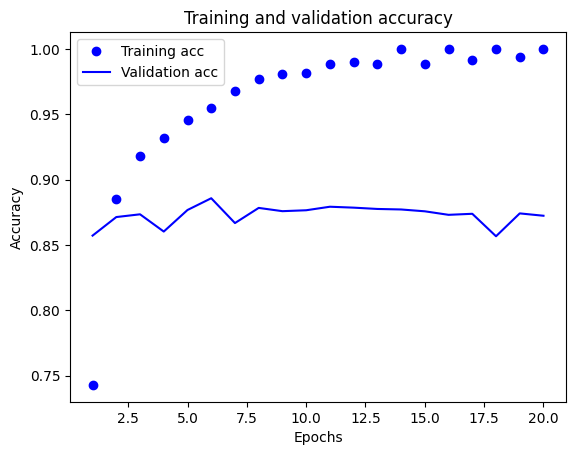

In [ ]:
plt.clf()
acc = history_dict22["accuracy"]
val_acc = history_dict22["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_22.fit(x_train, y_train, epochs=8, batch_size=512)
results_M22 = model_22.evaluate(x_test, y_test)
results_M22

Epoch 1/8
49/49 [==============================] - 4s 73ms/step - loss: 0.1744 - accuracy: 0.9475
Epoch 2/8
49/49 [==============================] - 2s 47ms/step - loss: 0.0983 - accuracy: 0.9688
Epoch 3/8
49/49 [==============================] - 2s 44ms/step - loss: 0.0628 - accuracy: 0.9817
Epoch 4/8
49/49 [==============================] - 2s 47ms/step - loss: 0.0362 - accuracy: 0.9913
Epoch 5/8
49/49 [==============================] - 2s 45ms/step - loss: 0.0228 - accuracy: 0.9944
Epoch 6/8
49/49 [==============================] - 3s 58ms/step - loss: 0.0200 - accuracy: 0.9949
Epoch 7/8
49/49 [==============================] - 3s 62ms/step - loss: 0.0159 - accuracy: 0.9951
Epoch 8/8
782/782 [==============================] - 5s 6ms/step - loss: 0.5600 - accuracy: 0.8663


[0.559965968132019, 0.8662800192832947]

Training the model with 128-Units



In [ ]:
model_23 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_23.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history23 = model_23.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict23 = history23.history
history_dict23.keys()

Epoch 1/20
30/30 [==============================] - 4s 129ms/step - loss: 0.5211 - accuracy: 0.7409 - val_loss: 0.3460 - val_accuracy: 0.8665
Epoch 2/20
30/30 [==============================] - 3s 115ms/step - loss: 0.3012 - accuracy: 0.8781 - val_loss: 0.2820 - val_accuracy: 0.8857
Epoch 3/20
30/30 [==============================] - 4s 147ms/step - loss: 0.2334 - accuracy: 0.9105 - val_loss: 0.2737 - val_accuracy: 0.8891
Epoch 4/20
30/30 [==============================] - 3s 116ms/step - loss: 0.1887 - accuracy: 0.9247 - val_loss: 0.2787 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 3s 115ms/step - loss: 0.1352 - accuracy: 0.9523 - val_loss: 0.2941 - val_accuracy: 0.8837
Epoch 6/20
30/30 [==============================] - 3s 116ms/step - loss: 0.1314 - accuracy: 0.9493 - val_loss: 0.3017 - val_accuracy: 0.8841
Epoch 7/20
30/30 [==============================] - 4s 145ms/step - loss: 0.0865 - accuracy: 0.9714 - val_loss: 0.3375 - val_accuracy: 0.8808
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss



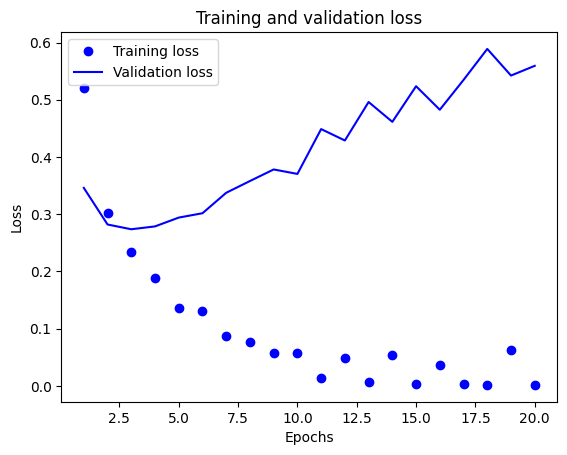

In [ ]:
loss_values = history_dict23["loss"]
val_loss_values = history_dict23["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy



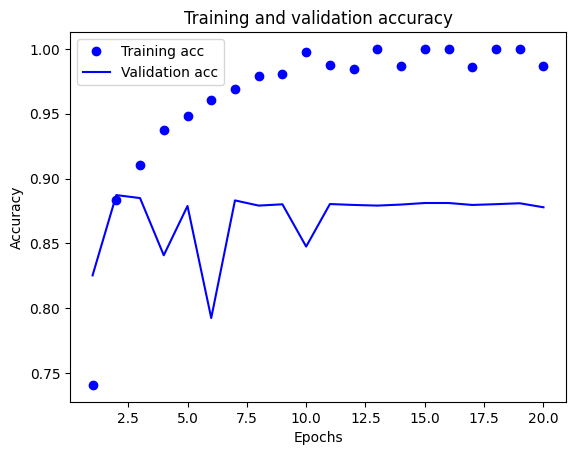

In [ ]:
plt.clf()
acc = history_dict23["accuracy"]
val_acc = history_dict23["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_23.fit(x_train, y_train, epochs=8, batch_size=512)
results_M23 = model_23.evaluate(x_test, y_test)
results_M23

Epoch 1/8
49/49 [==============================] - 4s 88ms/step - loss: 0.1536 - accuracy: 0.9527
Epoch 2/8
49/49 [==============================] - 5s 98ms/step - loss: 0.0833 - accuracy: 0.9742
Epoch 3/8
49/49 [==============================] - 4s 72ms/step - loss: 0.0458 - accuracy: 0.9863
Epoch 4/8
49/49 [==============================] - 4s 73ms/step - loss: 0.0219 - accuracy: 0.9946
Epoch 5/8
49/49 [==============================] - 5s 100ms/step - loss: 0.0201 - accuracy: 0.9936
Epoch 6/8
49/49 [==============================] - 4s 73ms/step - loss: 0.0181 - accuracy: 0.9948
Epoch 7/8
49/49 [==============================] - 4s 75ms/step - loss: 0.0020 - accuracy: 0.9999
Epoch 8/8
782/782 [==============================] - 5s 6ms/step - loss: 0.5306 - accuracy: 0.8721


[0.53059321641922, 0.8720800280570984]

In [ ]:
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_MSE = model_MSE.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

Epoch 1/20
30/30 [==============================] - 5s 137ms/step - loss: 0.1867 - accuracy: 0.7663 - val_loss: 0.1373 - val_accuracy: 0.8575
Epoch 2/20
30/30 [==============================] - 2s 73ms/step - loss: 0.1125 - accuracy: 0.8845 - val_loss: 0.1056 - val_accuracy: 0.8794
Epoch 3/20
30/30 [==============================] - 2s 62ms/step - loss: 0.0843 - accuracy: 0.9096 - val_loss: 0.0980 - val_accuracy: 0.8754
Epoch 4/20
30/30 [==============================] - 2s 61ms/step - loss: 0.0686 - accuracy: 0.9246 - val_loss: 0.0871 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 2s 61ms/step - loss: 0.0595 - accuracy: 0.9338 - val_loss: 0.0846 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0509 - accuracy: 0.9453 - val_loss: 0.0837 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0453 - accuracy: 0.9531 - val_loss: 0.0841 - val_accuracy: 0.8846
Epoch 8/20
3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

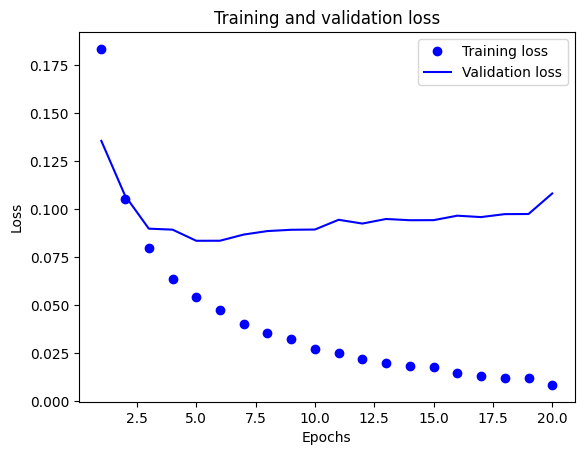

In [ ]:
loss_values = history_dict_MSE["loss"]
val_loss_values = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

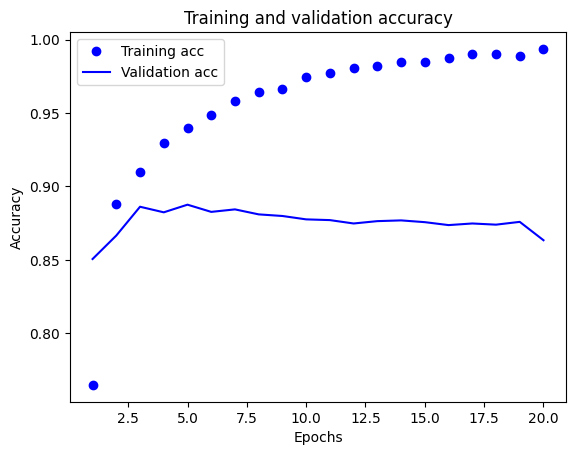

In [ ]:
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_MSE.fit(x_train, y_train, epochs=8, batch_size=512)
results_MSE = model_MSE.evaluate(x_test, y_test)
results_MSE

Epoch 1/8
49/49 [==============================] - 2s 50ms/step - loss: 0.0458 - accuracy: 0.9456
Epoch 2/8
49/49 [==============================] - 3s 55ms/step - loss: 0.0382 - accuracy: 0.9555
Epoch 3/8
49/49 [==============================] - 2s 51ms/step - loss: 0.0334 - accuracy: 0.9634
Epoch 4/8
49/49 [==============================] - 3s 55ms/step - loss: 0.0294 - accuracy: 0.9696
Epoch 5/8
49/49 [==============================] - 2s 35ms/step - loss: 0.0273 - accuracy: 0.9720
Epoch 6/8
49/49 [==============================] - 2s 36ms/step - loss: 0.0257 - accuracy: 0.9745
Epoch 7/8
49/49 [==============================] - 2s 33ms/step - loss: 0.0233 - accuracy: 0.9772
Epoch 8/8
782/782 [==============================] - 3s 4ms/step - loss: 0.1094 - accuracy: 0.8643


[0.10936444252729416, 0.8642799854278564]

Training the model using Tanh Activation Function



In [ ]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_tanh = history_model_tanh.history
history_dict_tanh.keys()

Epoch 1/20
30/30 [==============================] - 4s 106ms/step - loss: 0.5075 - accuracy: 0.7883 - val_loss: 0.3932 - val_accuracy: 0.8566
Epoch 2/20
30/30 [==============================] - 2s 70ms/step - loss: 0.3129 - accuracy: 0.8986 - val_loss: 0.3107 - val_accuracy: 0.8796
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2290 - accuracy: 0.9250 - val_loss: 0.3149 - val_accuracy: 0.8689
Epoch 4/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1813 - accuracy: 0.9401 - val_loss: 0.2739 - val_accuracy: 0.8879
Epoch 5/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1441 - accuracy: 0.9533 - val_loss: 0.3082 - val_accuracy: 0.8768
Epoch 6/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1187 - accuracy: 0.9607 - val_loss: 0.3030 - val_accuracy: 0.8827
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0960 - accuracy: 0.9711 - val_loss: 0.3285 - val_accuracy: 0.8799
Epoch 8/20
3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss



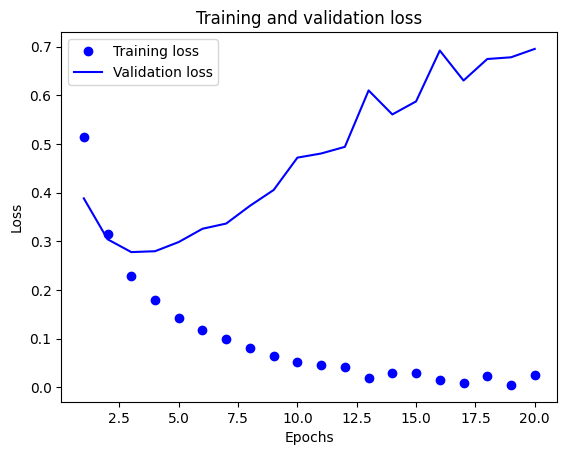

In [ ]:
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Plotting graph between Training and Validation accuracy



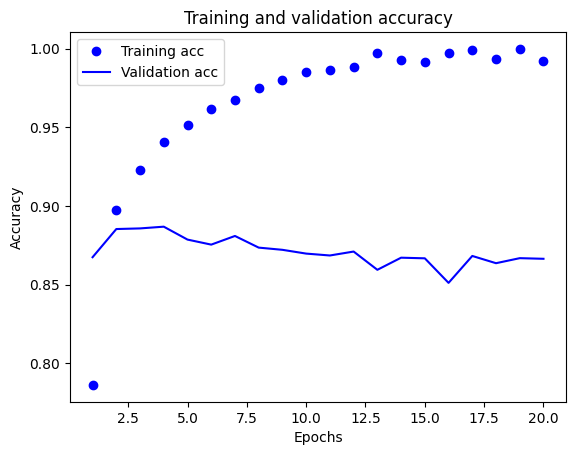

In [ ]:
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_tanh.fit(x_train, y_train, epochs=8, batch_size=512)
results_tanh = model_tanh.evaluate(x_test, y_test)
results_tanh

Epoch 1/8
49/49 [==============================] - 2s 33ms/step - loss: 0.2538 - accuracy: 0.9430
Epoch 2/8
49/49 [==============================] - 2s 43ms/step - loss: 0.1437 - accuracy: 0.9583
Epoch 3/8
49/49 [==============================] - 3s 58ms/step - loss: 0.1163 - accuracy: 0.9649
Epoch 4/8
49/49 [==============================] - 3s 58ms/step - loss: 0.0993 - accuracy: 0.9694
Epoch 5/8
49/49 [==============================] - 3s 54ms/step - loss: 0.0856 - accuracy: 0.9736
Epoch 6/8
49/49 [==============================] - 2s 41ms/step - loss: 0.0776 - accuracy: 0.9756
Epoch 7/8
49/49 [==============================] - 2s 33ms/step - loss: 0.0693 - accuracy: 0.9787
Epoch 8/8
782/782 [==============================] - 3s 4ms/step - loss: 0.5695 - accuracy: 0.8545


[0.5694527626037598, 0.8545200228691101]

Regularisation

In [ ]:
from tensorflow.keras import regularizers
model_regularisation = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularisation.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_regularisation = model_regularisation.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_regularisation = history_model_regularisation.history
history_dict_regularisation.keys()

Epoch 1/20
30/30 [==============================] - 6s 148ms/step - loss: 0.5963 - accuracy: 0.7749 - val_loss: 0.4684 - val_accuracy: 0.8601
Epoch 2/20
30/30 [==============================] - 1s 47ms/step - loss: 0.3981 - accuracy: 0.8845 - val_loss: 0.3811 - val_accuracy: 0.8763
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.3125 - accuracy: 0.9128 - val_loss: 0.3416 - val_accuracy: 0.8863
Epoch 4/20
30/30 [==============================] - 2s 55ms/step - loss: 0.2738 - accuracy: 0.9236 - val_loss: 0.3332 - val_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2408 - accuracy: 0.9363 - val_loss: 0.4073 - val_accuracy: 0.8552
Epoch 6/20
30/30 [==============================] - 2s 54ms/step - loss: 0.2275 - accuracy: 0.9412 - val_loss: 0.3304 - val_accuracy: 0.8872
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2085 - accuracy: 0.9512 - val_loss: 0.3606 - val_accuracy: 0.8747
Epoch 8/20
3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss



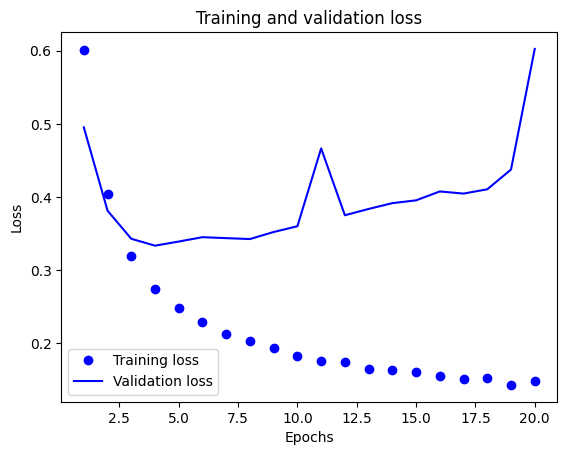

In [ ]:
loss_values = history_dict_regularisation["loss"]
val_loss_values = history_dict_regularisation["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy



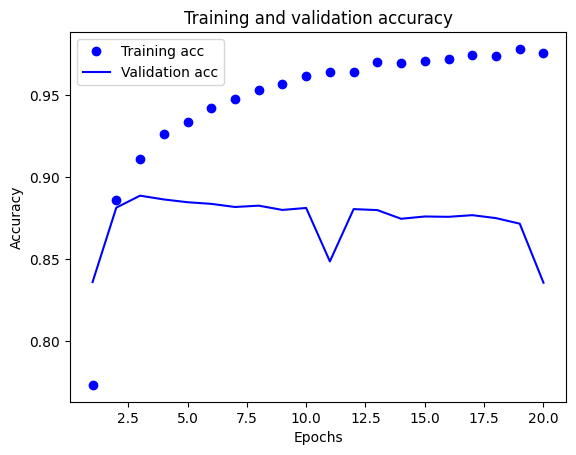

In [ ]:
plt.clf()
acc = history_dict_regularisation["accuracy"]
val_acc = history_dict_regularisation["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_regularisation.fit(x_train, y_train, epochs=8, batch_size=512)
results_regularisation = model_regularisation.evaluate(x_test, y_test)
results_regularisation

Epoch 1/8
49/49 [==============================] - 2s 33ms/step - loss: 0.2489 - accuracy: 0.9366
Epoch 2/8
49/49 [==============================] - 2s 36ms/step - loss: 0.2103 - accuracy: 0.9453
Epoch 3/8
49/49 [==============================] - 2s 32ms/step - loss: 0.1958 - accuracy: 0.9516
Epoch 4/8
49/49 [==============================] - 2s 40ms/step - loss: 0.1845 - accuracy: 0.9549
Epoch 5/8
49/49 [==============================] - 3s 52ms/step - loss: 0.1788 - accuracy: 0.9572
Epoch 6/8
49/49 [==============================] - 3s 53ms/step - loss: 0.1766 - accuracy: 0.9585
Epoch 7/8
49/49 [==============================] - 3s 53ms/step - loss: 0.1704 - accuracy: 0.9629
Epoch 8/8
782/782 [==============================] - 3s 3ms/step - loss: 0.5123 - accuracy: 0.8488


[0.5123084783554077, 0.848800003528595]

Dropout

In [ ]:
from tensorflow.keras import regularizers
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

Epoch 1/20
30/30 [==============================] - 4s 103ms/step - loss: 0.6207 - accuracy: 0.6487 - val_loss: 0.5102 - val_accuracy: 0.8470
Epoch 2/20
30/30 [==============================] - 2s 72ms/step - loss: 0.4987 - accuracy: 0.7652 - val_loss: 0.3906 - val_accuracy: 0.8742
Epoch 3/20
30/30 [==============================] - 2s 73ms/step - loss: 0.4185 - accuracy: 0.8293 - val_loss: 0.3228 - val_accuracy: 0.8844
Epoch 4/20
30/30 [==============================] - 2s 70ms/step - loss: 0.3575 - accuracy: 0.8580 - val_loss: 0.2995 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 2s 82ms/step - loss: 0.3185 - accuracy: 0.8829 - val_loss: 0.2795 - val_accuracy: 0.8901
Epoch 6/20
30/30 [==============================] - 2s 72ms/step - loss: 0.2769 - accuracy: 0.8994 - val_loss: 0.2780 - val_accuracy: 0.8896
Epoch 7/20
30/30 [==============================] - 1s 50ms/step - loss: 0.2514 - accuracy: 0.9112 - val_loss: 0.2721 - val_accuracy: 0.8906
Epoch 8/20
3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss



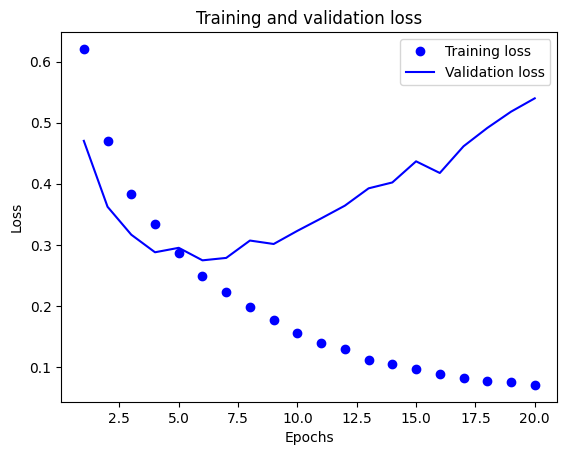

In [ ]:
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy



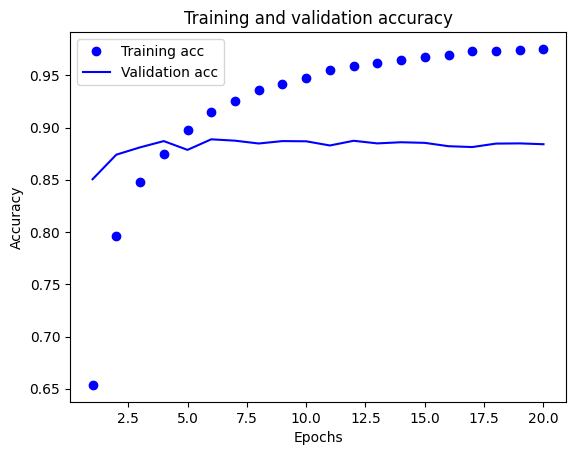

In [ ]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_Dropout.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout = model_Dropout.evaluate(x_test, y_test)
results_Dropout

Epoch 1/8
49/49 [==============================] - 2s 36ms/step - loss: 0.2546 - accuracy: 0.9250
Epoch 2/8
49/49 [==============================] - 2s 36ms/step - loss: 0.2092 - accuracy: 0.9362
Epoch 3/8
49/49 [==============================] - 2s 47ms/step - loss: 0.1825 - accuracy: 0.9446
Epoch 4/8
49/49 [==============================] - 2s 47ms/step - loss: 0.1631 - accuracy: 0.9507
Epoch 5/8
49/49 [==============================] - 7s 137ms/step - loss: 0.1564 - accuracy: 0.9510
Epoch 6/8
49/49 [==============================] - 3s 55ms/step - loss: 0.1500 - accuracy: 0.9532
Epoch 7/8
49/49 [==============================] - 2s 41ms/step - loss: 0.1419 - accuracy: 0.9566
Epoch 8/8
782/782 [==============================] - 4s 5ms/step - loss: 0.4885 - accuracy: 0.8717


[0.4884527623653412, 0.871720016002655]

Training the model with Hypertunned Parameters



In [ ]:
from tensorflow.keras import regularizers
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_Hyper = model_Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

Epoch 1/20
30/30 [==============================] - 4s 102ms/step - loss: 0.2559 - accuracy: 0.5572 - val_loss: 0.2355 - val_accuracy: 0.6988
Epoch 2/20
30/30 [==============================] - 3s 88ms/step - loss: 0.2232 - accuracy: 0.6929 - val_loss: 0.1789 - val_accuracy: 0.8356
Epoch 3/20
30/30 [==============================] - 3s 91ms/step - loss: 0.1823 - accuracy: 0.7868 - val_loss: 0.1390 - val_accuracy: 0.8706
Epoch 4/20
30/30 [==============================] - 3s 107ms/step - loss: 0.1488 - accuracy: 0.8412 - val_loss: 0.1105 - val_accuracy: 0.8794
Epoch 5/20
30/30 [==============================] - 2s 81ms/step - loss: 0.1245 - accuracy: 0.8708 - val_loss: 0.1005 - val_accuracy: 0.8845
Epoch 6/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1055 - accuracy: 0.8935 - val_loss: 0.1014 - val_accuracy: 0.8829
Epoch 7/20
30/30 [==============================] - 2s 63ms/step - loss: 0.0912 - accuracy: 0.9106 - val_loss: 0.0999 - val_accuracy: 0.8860
Epoch 8/20


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss



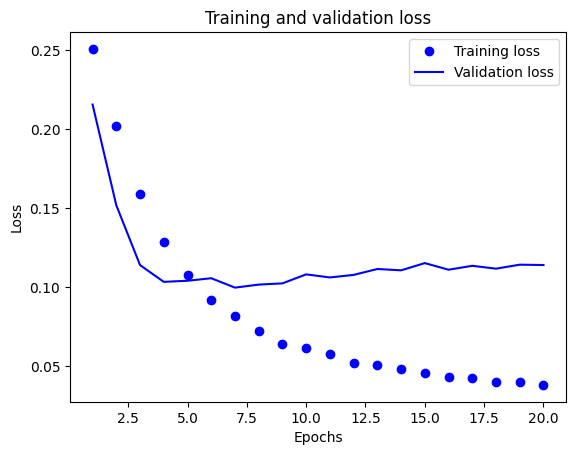

In [ ]:
loss_values = history_dict_Hyper["loss"]
val_loss_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy



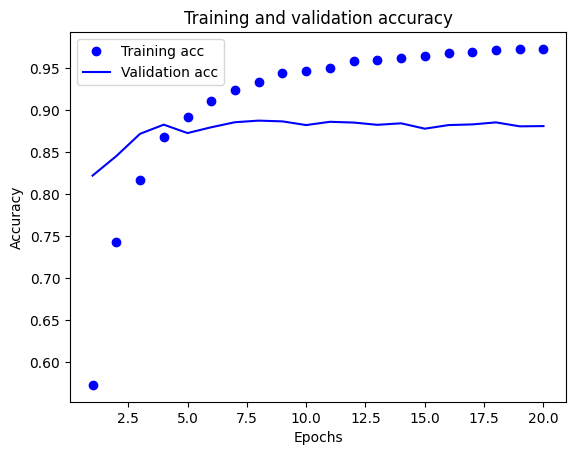

In [ ]:
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_Hyper.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper = model_Hyper.evaluate(x_test, y_test)
results_Hyper

Epoch 1/8
49/49 [==============================] - 3s 54ms/step - loss: 0.0740 - accuracy: 0.9291
Epoch 2/8
49/49 [==============================] - 3s 68ms/step - loss: 0.0681 - accuracy: 0.9345
Epoch 3/8
49/49 [==============================] - 3s 69ms/step - loss: 0.0626 - accuracy: 0.9418
Epoch 4/8
49/49 [==============================] - 3s 59ms/step - loss: 0.0590 - accuracy: 0.9461
Epoch 5/8
49/49 [==============================] - 2s 48ms/step - loss: 0.0575 - accuracy: 0.9478
Epoch 6/8
49/49 [==============================] - 2s 43ms/step - loss: 0.0548 - accuracy: 0.9512
Epoch 7/8
49/49 [==============================] - 2s 45ms/step - loss: 0.0526 - accuracy: 0.9528
Epoch 8/8
782/782 [==============================] - 3s 4ms/step - loss: 0.1138 - accuracy: 0.8787


[0.11376654356718063, 0.8786799907684326]

Summary of all models



In [ ]:
All_Loss= np.array([results_Dropout[0],results_Hyper[0],results_MSE[0],results_regularisation[0],results_tanh[0]])*100
All_Loss
All_Accuracy= np.array([results_Dropout[1],results_Hyper[1],results_MSE[1],results_regularisation[1],results_tanh[1]])*100
All_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularisation','model_tanh']

plt.clf()

<Figure size 640x480 with 0 Axes>

Comparing all models using graph



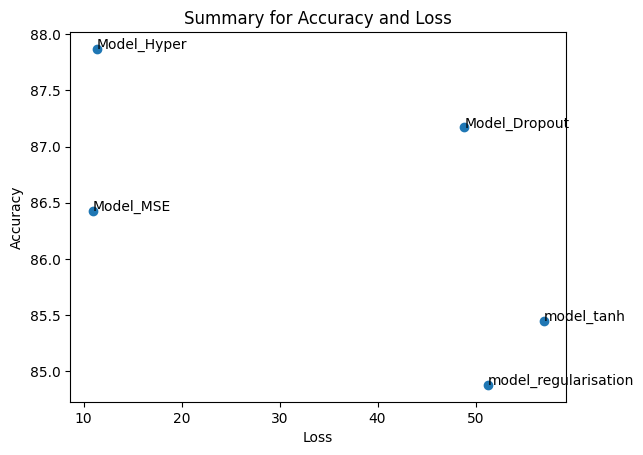

In [ ]:
fig, ax = plt.subplots()
ax.scatter(All_Loss,All_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Loss[i],All_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()